# Accelerometer Analysis


In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
plt.style.use('seaborn-bright')

from scipy import signal
from scipy.fft import fft
import scipy

from sklearn import preprocessing

filepath = (r"C:\Users\ngaij\FYP\onesample_accel\onesample(accel)_5.csv")
df = pd.read_csv(filepath)
id = 5

In [33]:
timearray = (df['time']).to_numpy(dtype=float)
X1 = preprocessing.scale((df['X1']).to_numpy(dtype=float))
Y1 = preprocessing.scale((df['Y1']).to_numpy(dtype=float))
X2 = preprocessing.scale((df['X2']).to_numpy(dtype=float))
Y2 = preprocessing.scale((df['Y2']).to_numpy(dtype=float))
Z2 = preprocessing.scale((df['Z2']).to_numpy(dtype=float))
scale = np.linspace(0,(max(timearray)-min(timearray)),len(timearray))

In [34]:
df = pd.read_csv(filepath)
print("Test " + str(id) +' length is : ', len(df))
print("Test " + str(id) + "duration is :", (max(timearray)-min(timearray)))

Test 5 length is :  820
Test 5duration is : 2.709000000000003


In [35]:
# Smoothen
for i in range(len(timearray)):
    j= i-1
    if timearray[i] == timearray[j]:
        X1[i] = (X1[i]+X1[j])/2
        Y1[i] = (Y1[i]+Y1[j])/2
        X2[i] = (X2[i]+X2[j])/2
        Y2[i] = (Y2[i]+Y2[j])/2
        Z2[i] = (Z2[i]+Z2[j])/2

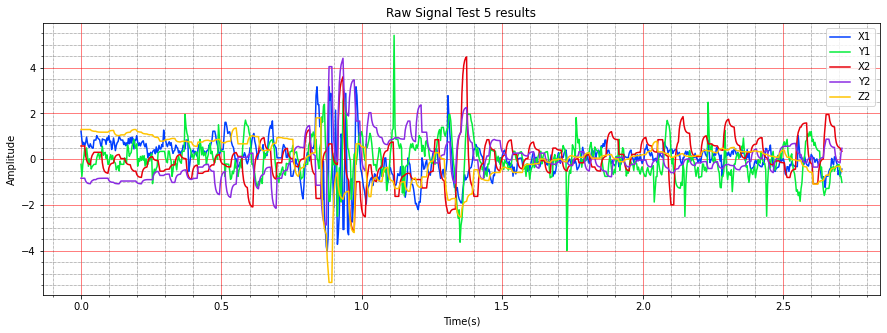

In [36]:
plt.title("Raw Signal Test " + str(id) + " results")
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.plot(scale,X1, label = "X1")
plt.plot(scale,Y1, label = "Y1")
plt.plot(scale,X2, label = "X2")
plt.plot(scale,Y2, label = "Y2")
plt.plot(scale,Z2, label = "Z2")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.legend(loc='upper right')

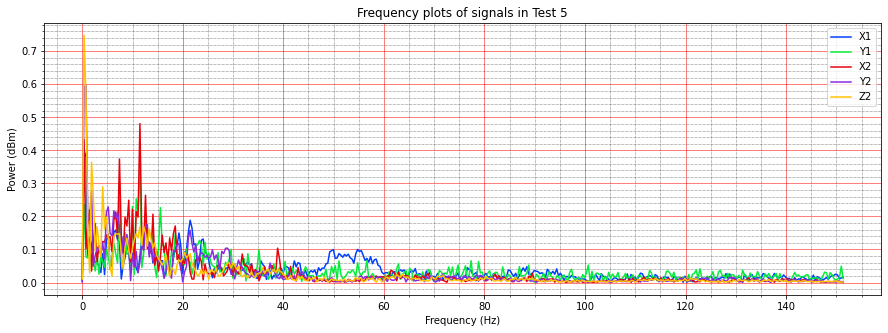

In [37]:
N = len(timearray)
T = (max(timearray)-min(timearray))/N
yf1 = fft(X1)
yf2 = fft(Y1)
yf3 = fft(X2)
yf4 = fft(Y2)
yf5 = fft(Z2)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.title("Frequency plots of signals in Test "+str(id))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dBm)")
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]), label = 'X1')
plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]), label = 'Y1')
plt.plot(xf, 2.0/N * np.abs(yf3[0:N//2]), label = 'X2')
plt.plot(xf, 2.0/N * np.abs(yf4[0:N//2]), label = 'Y2')
plt.plot(xf, 2.0/N * np.abs(yf5[0:N//2]), label = 'Z2')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.legend()

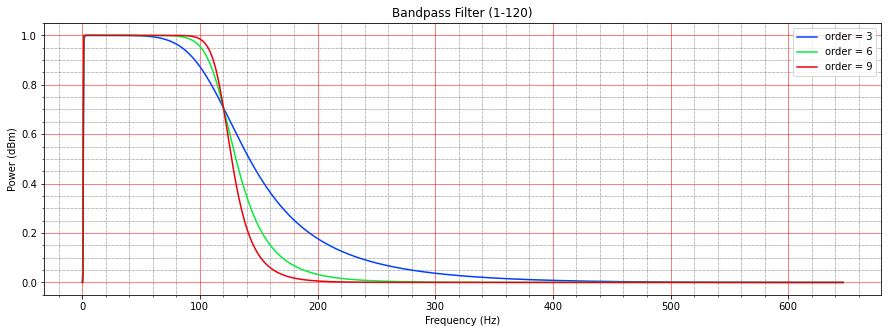

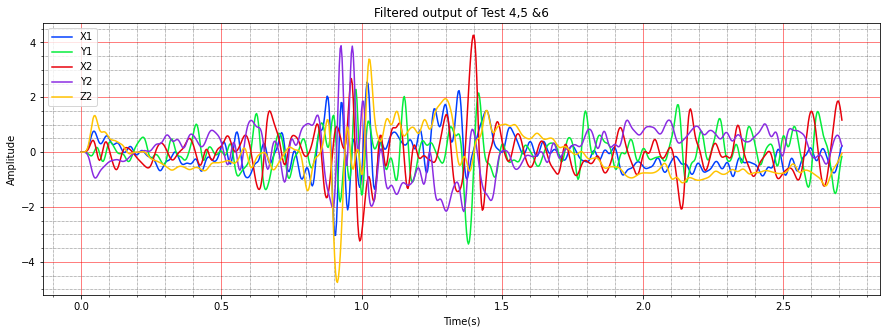

In [38]:
from scipy.signal import butter, sosfilt, sosfreqz

fs = 1527/1.18  # Sampling frequency

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

lowcut = 1
highcut = 120

plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = sosfreqz(sos, worN=2000)
        plt.title("Bandpass Filter (1-120)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power (dBm)")
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.minorticks_on()
        plt.legend()

plt.figure()
# plt.plot(scale, test4, label='a')
plt.title("Filtered output of Test 4,5 &6")
output1 = sosfilt(sos, X1)
output2 = sosfilt(sos, Y1)
output3 = sosfilt(sos, X2)
output4 = sosfilt(sos, Y2)
output5 = sosfilt(sos, Z2)
plt.plot(scale, output1, label = "X1")
plt.plot(scale, output2, label = "Y1")
plt.plot(scale, output3, label = "X2")
plt.plot(scale, output4, label = "Y2")
plt.plot(scale, output5, label = "Z2")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.legend()


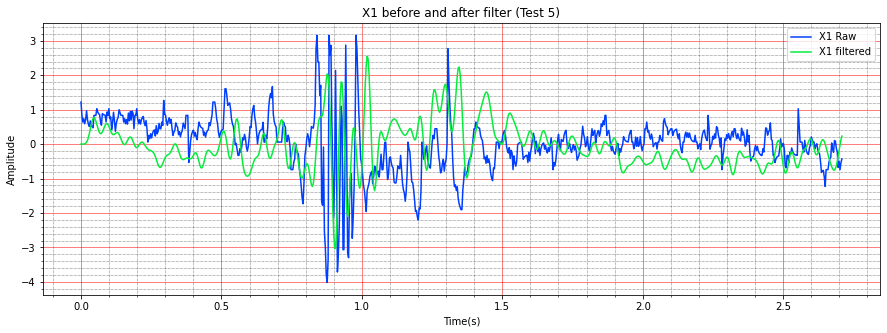

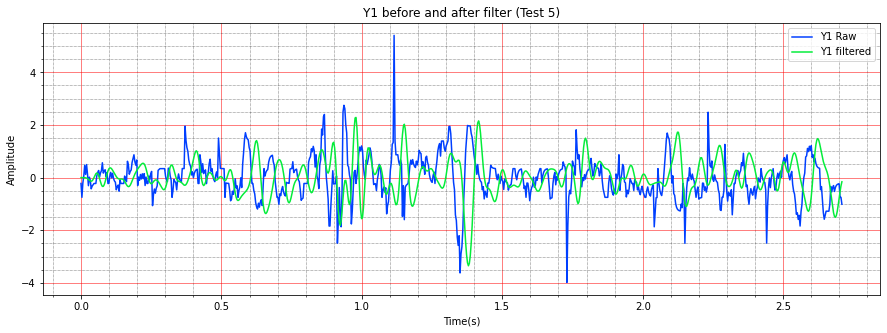

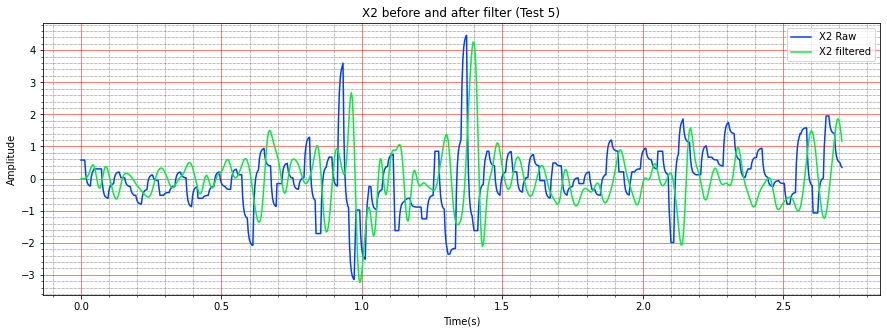

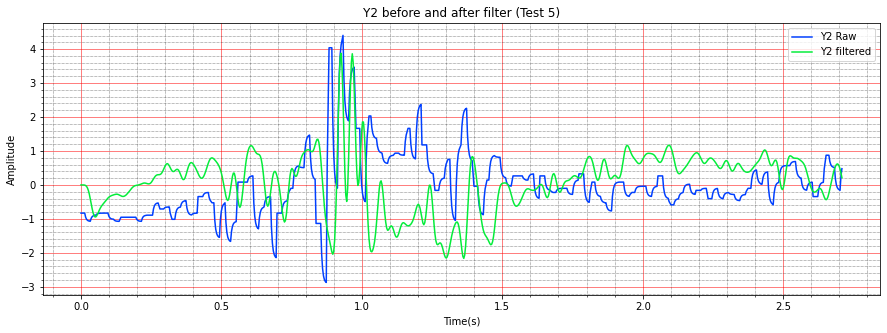

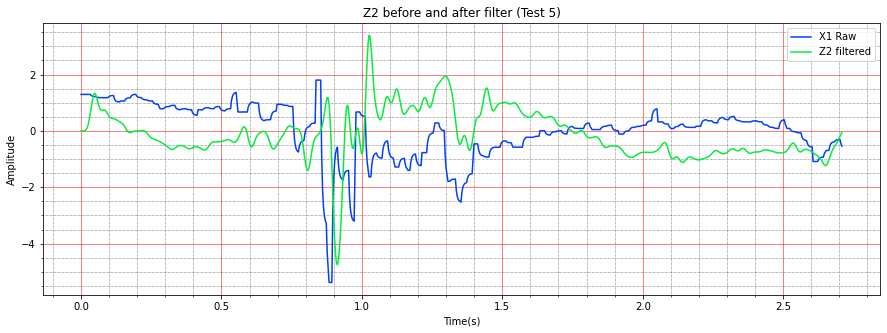

In [39]:
plt.figure()
plt.title("X1 before and after filter (Test " + str(id)+ ")")
plt.plot(scale, X1, label='X1 Raw')
plt.plot(scale, output1, label = "X1 filtered")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.legend()

plt.figure()
plt.title("Y1 before and after filter (Test " + str(id)+ ")")
plt.plot(scale, Y1, label='Y1 Raw')
plt.plot(scale, output2, label = "Y1 filtered")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.legend()

plt.figure()
plt.title("X2 before and after filter (Test " + str(id) + ")")
plt.plot(scale, X2, label='X2 Raw')
plt.plot(scale, output3, label = "X2 filtered")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.legend()

plt.figure()
plt.title("Y2 before and after filter (Test " + str(id)+ ")")
plt.plot(scale, Y2, label='Y2 Raw')
plt.plot(scale, output4, label = "Y2 filtered")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.legend()

plt.figure()
plt.title("Z2 before and after filter (Test " + str(id)+ ")")
plt.plot(scale, Z2, label='X1 Raw')
plt.plot(scale, output5, label = "Z2 filtered")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.legend()

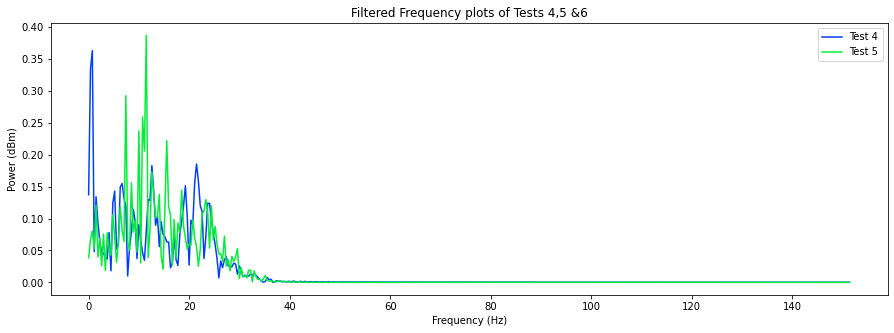

In [40]:
yff4 = fft(output1)
yff5 = fft(output2)
# yff6 = fft(output6)
plt.title("Filtered Frequency plots of Tests 4,5 &6")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dBm)")
plt.plot(xf, 2.0/N * np.abs(yff4[0:N//2]), label = 'Test 4')
plt.plot(xf, 2.0/N * np.abs(yff5[0:N//2]), label = 'Test 5')
# plt.plot(xf, 2.0/N * np.abs(yff6[0:N//2]), label = 'Test 6')
plt.legend()

In [41]:
# plt.plot(scale, test2, label='a')
# plt.plot(t, signalb, label='b')
# plt.plot(t, signalc, label='c')

fc = 60  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'high')
output = signal.filtfilt(b, a, test4)
plt.plot(scale, output, label='filtered')
plt.legend()
plt.show()

NameError: name 'test4' is not defined

ValueError: Digital filter critical frequencies must be 0 < Wn < 1